In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [ ]:
# Reading Whale Returns
whaleReturns = Path('whale_returns.csv')
whalePd = pd.read_csv(whaleReturns, index_col ="Date", parse_dates = True)
whalePd.head()

In [ ]:
# Counting Nulls
whalePd.isnull().sum()

In [ ]:
# Dropping Nulls
whalePd.dropna(inplace = True)
whalePd.isnull().sum()

In [ ]:
# Reading Algo Returns
algoReturns = Path('algo_returns.csv')
algoPd = pd.read_csv(algoReturns, index_col = "Date", parse_dates = True)
algoPd.head()

In [6]:
# Count Nulls
algoPd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop Nulls
algoPd.dropna(inplace = True)
algoPd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
# Reading S&P 500
sp500 = Path('sp500_history.csv')
sp500Pd = pd.read_csv(sp500, index_col = "Date", parse_dates = True)
sp500Pd.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
sp500Pd.info()
sp500Pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Fixing Data Type
sp500Pd["Close"]=sp500Pd["Close"].str.replace(r'$', "",regex = True)
sp500Pd["Close"] = sp500Pd["Close"].str.replace(",","")
sp500Pd.dtypes
sp500Pd.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
sp500Pd["Close"]=sp500Pd["Close"].astype('float64')
sp500Pd.info()
sp500Pd["Close"] = sp500Pd["Close"].pct_change()
sp500Pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Dropping Nulls
sp500Pd.dropna(inplace = True)
sp500Pd.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename Columns
sp500Pd.columns = ["S&P 500"]
sp500Pd.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
# Combing All Data Frames
combinedReturns = pd.concat([whalePd,algoPd,sp500Pd], axis="columns", join="inner")
combinedReturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:xlabel='Date'>

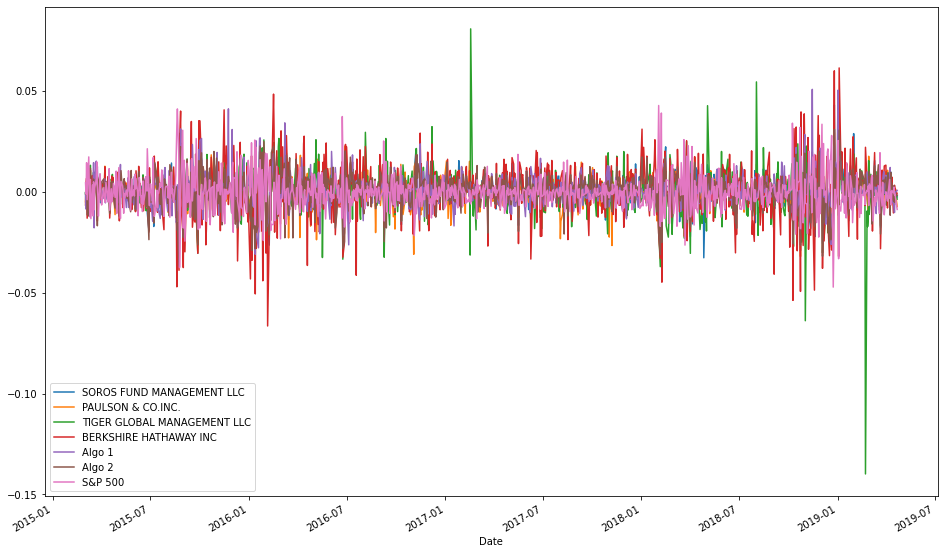

In [15]:
# Plot Daily returns
combinedReturns.plot(figsize=(16,10))

<AxesSubplot:xlabel='Date'>

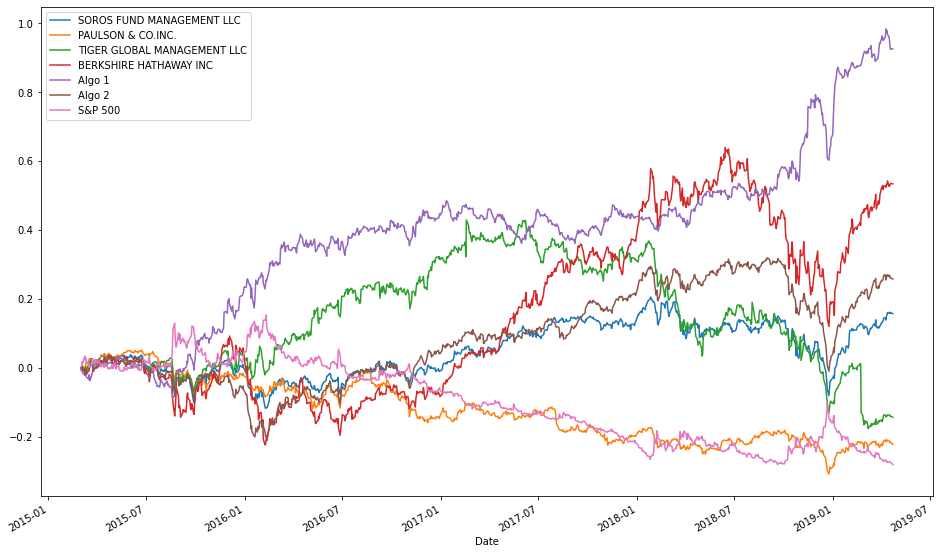

In [16]:
# Plot Cumulative Returns
cumReturns = (1+combinedReturns).cumprod()-1
cumReturns.plot(figsize=(16,10))

<AxesSubplot:>

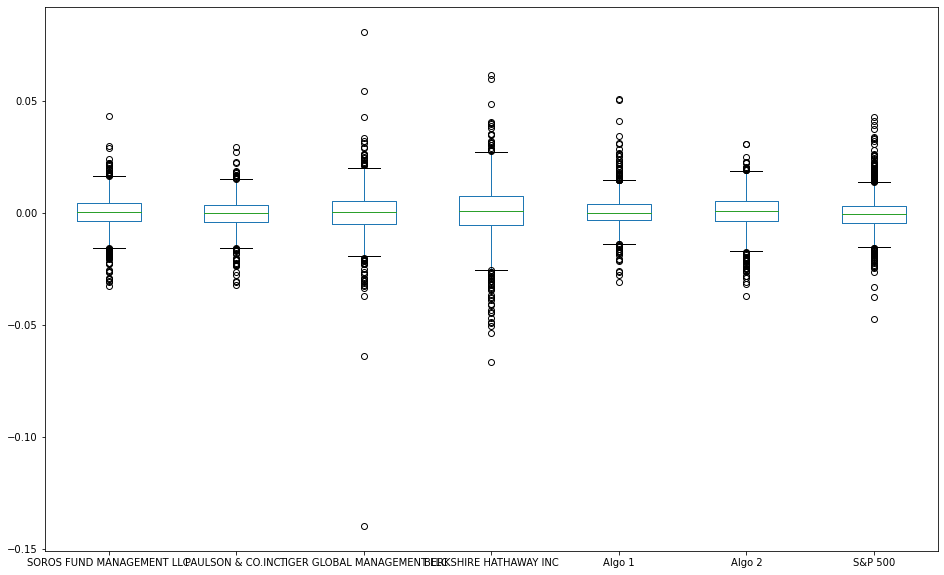

In [17]:
# Risk Analysis
combinedReturns.plot.box(figsize = (16,10))

In [18]:
# Daily Standard Devations
combinedReturnsSd = combinedReturns.std()
combinedReturnsSd

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [24]:
# Higher risk portfolios than S&P 500
combinedReturnsSd[(combinedReturnsSd['S&P 500']< combinedReturnsSd)]


TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [25]:
# Annual Standard Deviation
annualSd = combinedReturnsSd * np.sqrt(252)
annualSd.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

<AxesSubplot:xlabel='Date'>

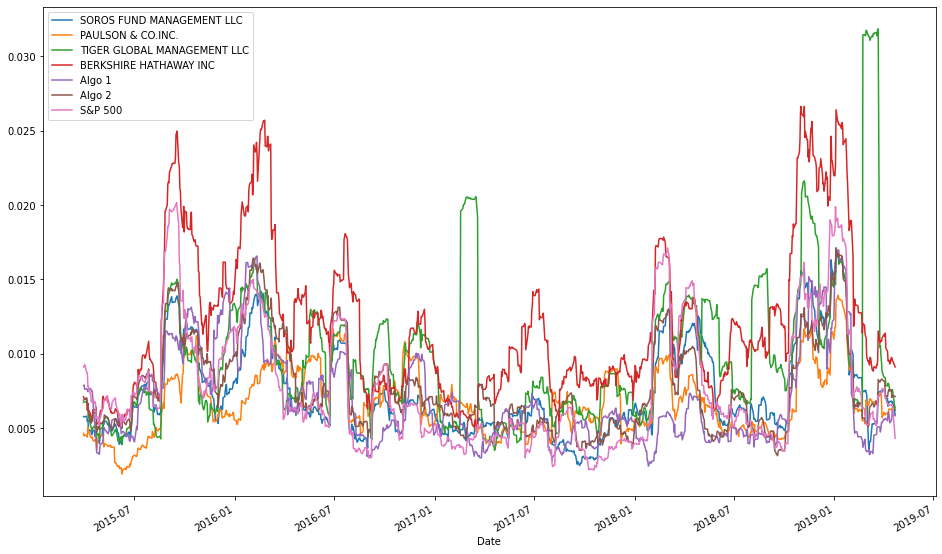

In [28]:
# Rolling Statistics Plot
combinedReturns.rolling(window = 21).std().plot(figsize=[16,10])

In [29]:
# Correlation
combinedReturns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [ ]:
# 60 day beta for Algo 1

<AxesSubplot:title={'center':'Rolling 60 Day'}, xlabel='Date'>

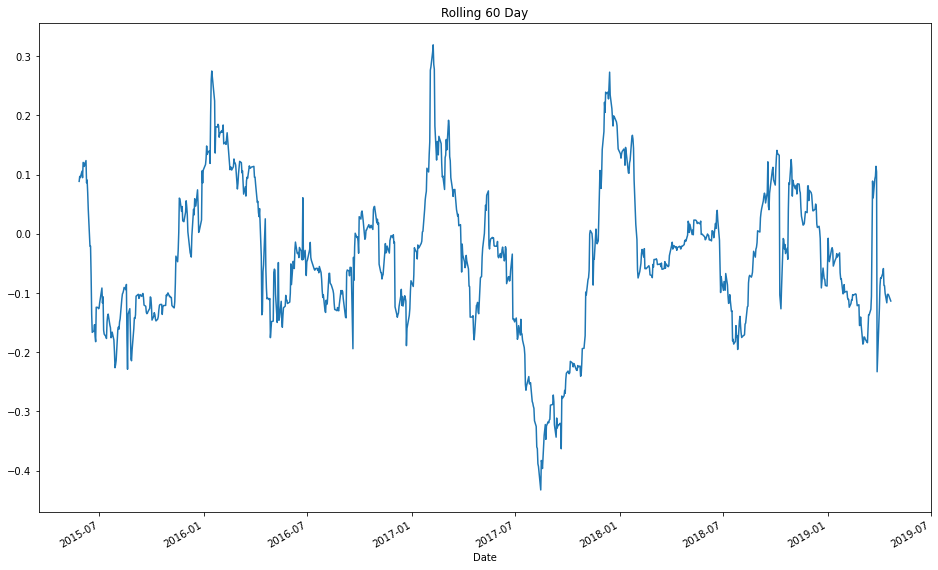

In [35]:
algo1 = combinedReturns['Algo 1'].rolling(window=60).cov(combinedReturns['S&P 500'])
sp500Var = combinedReturns['S&P 500'].rolling(window=60).var()
betaRollingAlgo1 = algo1/sp500Var
betaRollingAlgo1.plot(figsize=(16,10), title='Rolling 60 Day')

In [36]:
# Weighted Average
combinedReturns.ewm(halflife = 21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475


In [39]:
# Annualized Sharp Ratio
sharpRatio = (combinedReturns.mean() * 252)/ (combinedReturns.std() * np.sqrt(252))
sharpRatio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratio'}>

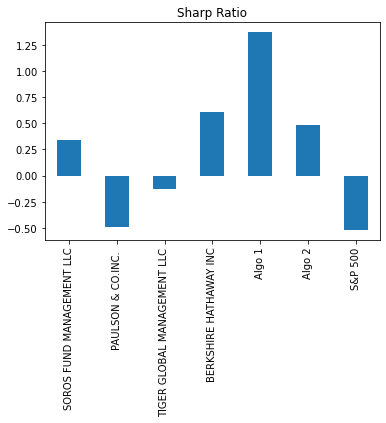

In [40]:
# Visualize Sharp Ratios As a Bar Plot
sharpRatio.plot(kind = 'bar', title = 'Sharp Ratio')

In [46]:
# Read first stock
apple = Path('aapl_historical.csv')
appleDf = pd.read_csv(apple, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True,usecols = ['Trade DATE', 'NOCP'])
appleDf.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [48]:
# Read Second Stock
costco = Path('cost_historical.csv')
costcoDf = pd.read_csv(costco, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True,usecols = ['Trade DATE', 'NOCP'])
costcoDf.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [49]:
# Third Stock
google = Path('goog_historical.csv')
googleDf = pd.read_csv(google, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True,usecols = ['Trade DATE', 'NOCP'])
googleDf.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [58]:
# Concatnate all stocks
portfolio = pd.concat([appleDf, costcoDf, googleDf], axis = 'columns', join = 'inner')
portfolio.columns = ['Apple', 'Costco', 'Google']
portReturns = portfolio.sort_index().pct_change()
portReturns.head()

,Apple,Costco,Google
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [59]:
# Reset Index
#portReturns.reset_index(inplace = True)
portReturns.head()

,Apple,Costco,Google
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [60]:
# Drop Nulls
portReturns.dropna(inplace = True)
portReturns.head()

,Apple,Costco,Google
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [61]:
# Calc Weighted Returns
weight = [1/3,1/3,1/3]
weightedReturn = portReturns.dot(weight)
weightedReturn.sum()                           

0.14569723027355785

In [64]:
# Cumlative Return
cumReturn = (1 + weightedReturn).cumprod()-1
cumReturn.sum()


16.3150042358619

In [78]:
# Join DataFrames
portReturns = pd.concat([weightedReturn, whalePd, sp500Pd], axis = 'columns', join = 'inner')
portReturns.rename(columns ={0:'My Portfolio'}, inplace = True)
portReturns.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333


In [79]:
# Compare Dates
portReturns.dropna(inplace = True)
portReturns.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333


In [80]:
# Risk Analysis
annualStd = portReturns.std() * np.sqrt(252)
annualStd

My Portfolio                   0.211627
SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
S&P 500                        0.152469
dtype: float64

In [81]:
# Rolling Analysis
portReturns.rolling(window = 21).std().tail()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
2019-04-15,0.007588,0.006804,0.006225,0.007525,0.009729,0.006532
2019-04-16,0.007507,0.006711,0.006224,0.007532,0.009731,0.006571
2019-04-17,0.007668,0.006773,0.006370,0.007574,0.009485,0.006505
2019-04-18,0.007482,0.006633,0.006303,0.007328,0.009475,0.006137
2019-04-22,0.006539,0.005915,0.006400,0.006197,0.009104,0.004302


In [84]:
# Beta 60 Day
portVar = portReturns['My Portfolio'].cov(portReturns['S&P 500'])
var = portReturns['S&P 500'].var()
beta = portVar/var
beta

0.007777644779290087

In [85]:
# Sharp Ratio
portfolioSharp = (portReturns.mean() * 252)/ (portReturns.std() * np.sqrt(252))
portfolioSharp

My Portfolio                   0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
S&P 500                       -0.427676
dtype: float64

<AxesSubplot:>

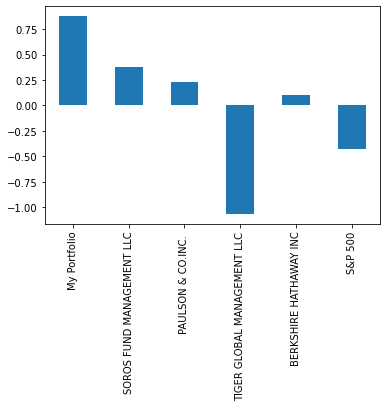

In [86]:
# Sharp Ratio Plot Bar
portfolioSharp.plot.bar()

In [ ]:
# How does yor Portfolio Do?
# My portfolio is better then all the other portfolios on the bar graph. It is the closest to 1 while the rest are closer.5 and negative numbers.